# Developing the data transformations that will be added to the pipeline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
pd.options.display.max_columns = 20
pd.options.display.max_rows = 10

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

## House Quality

In [15]:
df0 = create_housing_quality_features(train)

In [17]:
df0.groupby('pisonotiene').eviv1.value_counts()

pisonotiene  eviv1
0            0        8591
             1         809
1            1         157
Name: eviv1, dtype: int64

(array([  966.,     0.,     0.,     0.,     0.,  2416.,     0.,     0.,
            0.,  6175.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

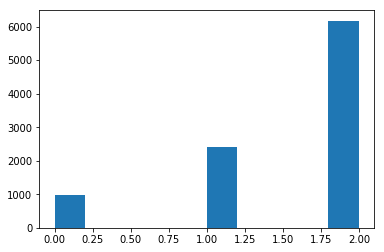

In [9]:

plt.hist(df0['floor_quality'])

## Household Payments

In [1]:
# Fill in households that own the house with 0 rent payment
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

# Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

NameError: name 'data' is not defined

## Education

(array([ 1.,  0.,  1.,  0.,  0.,  3.,  0.,  1.,  0.,  1.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

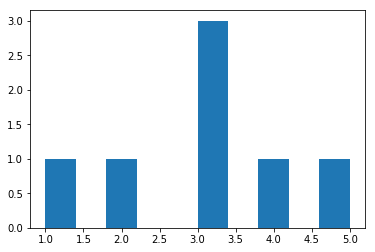

In [23]:
plt.hist([1,2,3,3,3,4,5])

In [27]:
train['meaneduc'].fillna(0)

0       10.00
1       12.00
2       11.00
3       11.00
4       11.00
        ...  
9552     8.25
9553     8.25
9554     8.25
9555     8.25
9556     8.25
Name: meaneduc, Length: 9557, dtype: float64

(array([  5.61000000e+02,   2.81900000e+03,   3.62600000e+03,
          1.51900000e+03,   8.52000000e+02,   1.29000000e+02,
          3.20000000e+01,   1.40000000e+01,   2.00000000e+00,
          3.00000000e+00]),
 array([  0. ,   3.7,   7.4,  11.1,  14.8,  18.5,  22.2,  25.9,  29.6,
         33.3,  37. ]),
 <a list of 10 Patch objects>)

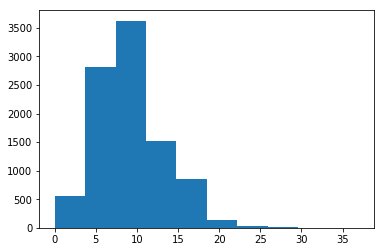

In [28]:
# train.meaneduc.plot.kde()
plt.hist(round(train['meaneduc'].fillna(0)))

In [ ]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

# There is an outlier, the max value should be 5
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

In [76]:
test_features = ['meaneduc'] + [
    'wall_quality', 'roof_quality', 'floor_quality'] + [
    'pisonotiene', 'cielorazo'] + [
    'asset_index'] + [
    'hogar_nin', 'overcrowding']

# test_features = ['meaneduc'] + [
#     'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3'] + [
#     'pisonotiene', 'cielorazo'] + [
#     'asset_index'] + [
#     'hogar_nin', 'overcrowding']

In [6]:
id_ = ['Id', 'idhogar', 'Target']
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

# Develop processing function

(array([  340.,     0.,  4995.,     0.,     0.,  2854.,     0.,  1112.,
            0.,   256.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

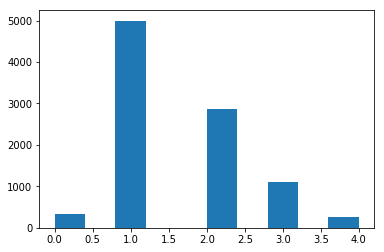

In [22]:
def create_asset_index(df):
    df['asset_index'] = (df['refrig'] + 
                      df['computer'] + 
                      (df['v18q1'] > 0) + 
                      df['television'])
    return df

def create_housing_quality_features(df):
    df['wall_quality'] = 0*df['epared1'] + 1*df['epared2'] + 2*df['epared3']
    df['roof_quality'] = 0*df['etecho1'] + 1*df['etecho2'] + 2*df['etecho3']
    df['floor_quality'] = 0*df['eviv1'] + 1*df['eviv2'] + 2*df['eviv3']
    return df

def processing(df):
    
    df = create_asset_index(df)
    df = create_housing_quality_features(df)
    
    return df

df_train = processing(train)
df_test = processing(test)
plt.hist(df_train['asset_index'])

In [77]:
X_train = df_train[test_features]
y_train = df_train['Target']

In [78]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score

In [79]:
# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [82]:
model = Pipeline(steps=[('imputer', Imputer(strategy = 'median')),
                ('random forest', RandomForestClassifier())])
# model = Pipeline(steps=[('random forest', RandomForestClassifier())])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('random forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0....n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [83]:
model.score(X_train,
            y_train)

0.95029821073558651

In [87]:
# 10 fold cross validation
cv_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = scorer)
print(cv_score.mean())

0.339817053274


In [74]:
estimator = model.steps[-1][1]
estimator

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [70]:
feature_importances = pd.DataFrame({'feature': test_features, 'importance': estimator.feature_importances_})
feature_importances.sort_values('importance', ascending=False)

,feature,importance
0,meaneduc,0.357285
8,overcrowding,0.201993
7,hogar_nin,0.129998
6,asset_index,0.074900
2,roof_quality,0.063150
3,floor_quality,0.058916
1,wall_quality,0.058227
5,cielorazo,0.049984
4,pisonotiene,0.005547


In [54]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence


In [75]:
my_plots = plot_partial_dependence(estimator, 
                                   features = [0,2],
                                   X=X_train,  
                                   grid_resolution=10)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').